In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [26]:
df = pd.read_csv(r"A:\newfileanal.csv")

In [27]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Maharashtra,Mumbai Suburban,400064,145,138
1,01-03-2025,Maharashtra,Mumbai Suburban,400050,122,203
2,01-03-2025,Maharashtra,Mumbai Suburban,400063,77,104
3,01-03-2025,Maharashtra,Mumbai Suburban,400095,203,355
4,01-03-2025,Maharashtra,Mumbai Suburban,400094,32,33


In [28]:
df.isna().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

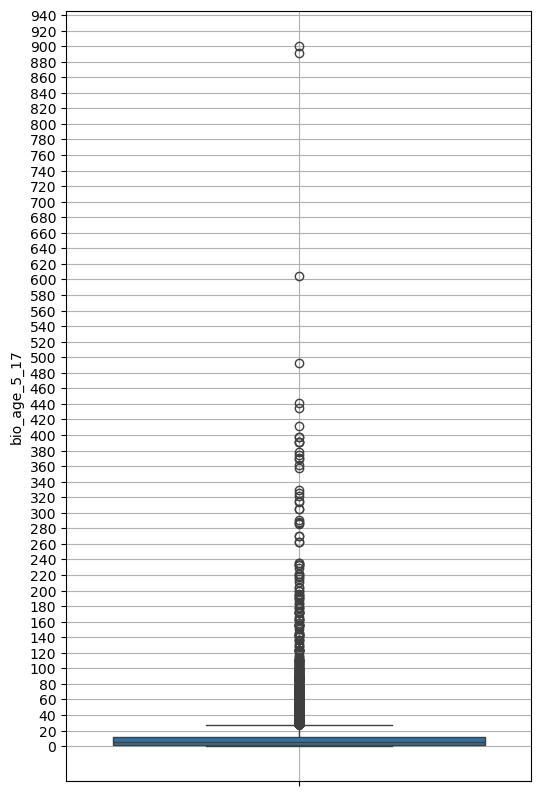

In [29]:
plt.figure(figsize=(6 , 10))
sns.boxplot(df['bio_age_5_17'])
plt.yticks(np.arange(0 , df['bio_age_5_17'].max() + 50 , 20))
plt.grid(True)
plt.show()

In [30]:
for i in df.columns:
    x = df[i].value_counts()
    print(x)
    print(f"the count value is {df[i].value_counts().count()}")

date
01-01-2026    73
01-05-2025    67
23-11-2025    65
29-12-2025    64
25-11-2025    64
              ..
25-05-2025    43
29-06-2025    42
21-09-2025    42
27-07-2025    41
15-08-2025    33
Name: count, Length: 230, dtype: int64
the count value is 230
state
Maharashtra    12353
Name: count, dtype: int64
the count value is 1
district
Mumbai Suburban    12353
Name: count, dtype: int64
the count value is 1
pincode
400086    259
400065    251
400058    251
400067    246
400101    244
400066    242
400102    239
400054    237
400059    237
400053    236
400061    236
400071    235
400103    235
400070    235
400084    234
400056    234
400063    234
400104    233
400089    233
400078    232
400080    232
400079    230
400094    230
400097    230
400064    229
400098    229
400075    229
400024    229
400051    226
400052    226
400092    226
400072    226
400091    226
400068    225
400076    224
400088    224
400050    223
400060    223
400099    223
400055    222
400049    222
400077   

In [31]:
df.drop(columns = ['state' , 'district'] , inplace=True)

In [32]:
df1 = df
df.head()

,date,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,400064,145,138
1,01-03-2025,400050,122,203
2,01-03-2025,400063,77,104
3,01-03-2025,400095,203,355
4,01-03-2025,400094,32,33


In [33]:
df['date'] = pd.to_datetime(df['date'] , format="%d-%m-%Y")

In [34]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

In [35]:
df.head()

,date,pincode,bio_age_5_17,bio_age_17_,month,year,day
0,2025-03-01,400064,145,138,3,2025,1
1,2025-03-01,400050,122,203,3,2025,1
2,2025-03-01,400063,77,104,3,2025,1
3,2025-03-01,400095,203,355,3,2025,1
4,2025-03-01,400094,32,33,3,2025,1


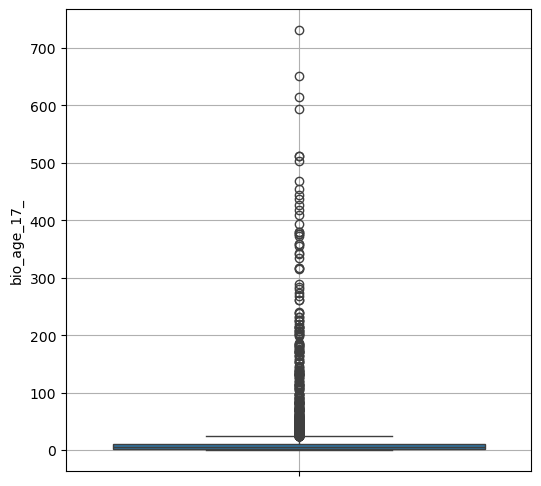

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(df['bio_age_17_'])
plt.grid(True)
plt.show()

In [37]:
df = df[~(df['bio_age_17_'] > 400)]

In [38]:
df.shape

(12339, 7)

In [39]:
df = df[~(df['bio_age_5_17'] > 240)]

In [40]:
df.shape

(12320, 7)

In [41]:
df.head()

,date,pincode,bio_age_5_17,bio_age_17_,month,year,day
0,2025-03-01,400064,145,138,3,2025,1
1,2025-03-01,400050,122,203,3,2025,1
2,2025-03-01,400063,77,104,3,2025,1
3,2025-03-01,400095,203,355,3,2025,1
4,2025-03-01,400094,32,33,3,2025,1


In [42]:
df['year'].value_counts()

year
2025    12134
2026      186
Name: count, dtype: int64

In [43]:
df = pd.get_dummies(df , columns=['year'] , dtype='uint8')

In [44]:
df.head()

,date,pincode,bio_age_5_17,bio_age_17_,month,day,year_2025,year_2026
0,2025-03-01,400064,145,138,3,1,1,0
1,2025-03-01,400050,122,203,3,1,1,0
2,2025-03-01,400063,77,104,3,1,1,0
3,2025-03-01,400095,203,355,3,1,1,0
4,2025-03-01,400094,32,33,3,1,1,0


In [45]:
df.drop(columns=['date'] , inplace=True)

In [46]:
df.head()

,pincode,bio_age_5_17,bio_age_17_,month,day,year_2025,year_2026
0,400064,145,138,3,1,1,0
1,400050,122,203,3,1,1,0
2,400063,77,104,3,1,1,0
3,400095,203,355,3,1,1,0
4,400094,32,33,3,1,1,0


In [47]:
df['pincode'].value_counts()

pincode
400086    258
400065    251
400058    251
400066    242
400067    242
400102    239
400101    239
400054    237
400059    237
400053    236
400061    236
400071    235
400103    235
400084    234
400056    234
400063    234
400089    233
400080    232
400070    232
400079    230
400094    230
400075    229
400024    229
400064    229
400104    229
400098    229
400078    229
400097    227
400052    226
400091    226
400092    226
400051    225
400068    224
400088    224
400076    224
400060    223
400050    223
400072    223
400099    223
400049    222
400077    222
400055    221
400074    220
400081    220
400042    220
400029    219
400083    217
400093    216
400069    215
400095    213
400043    211
400057    209
400087    206
400082    194
400096     26
400085      4
Name: count, dtype: int64

In [48]:
df = df[df['pincode'].isin(df['pincode'].value_counts()[lambda x: x > 25].index)]

In [49]:
df.shape

(12316, 7)

In [50]:
df.head()

,pincode,bio_age_5_17,bio_age_17_,month,day,year_2025,year_2026
0,400064,145,138,3,1,1,0
1,400050,122,203,3,1,1,0
2,400063,77,104,3,1,1,0
3,400095,203,355,3,1,1,0
4,400094,32,33,3,1,1,0


In [51]:
x = df[df['pincode'] == 400096	]
x

,pincode,bio_age_5_17,bio_age_17_,month,day,year_2025,year_2026
362,400096,1,0,11,14,1,0
1673,400096,1,0,9,13,1,0
2259,400096,0,1,6,20,1,0
2517,400096,1,0,1,1,0,1
2577,400096,0,1,10,29,1,0
3203,400096,0,1,6,19,1,0
3354,400096,0,1,5,27,1,0
4534,400096,1,0,11,20,1,0
5535,400096,0,1,11,16,1,0
5564,400096,0,1,9,12,1,0


In [52]:
df['pincode'].value_counts().count()


np.int64(55)

In [53]:
insight_df = df.groupby('pincode').agg(
    all_pinocde = ('pincode' , 'count'),
    most_children = ('bio_age_5_17' , 'sum'),
    most_adult = ('bio_age_17_' , 'sum')
)

In [54]:
insight_df.sort_values(ascending=False ,  by = 'most_children')
#the pincode 400096 corresponding georegao west have not right calculated

,all_pinocde,most_children,most_adult
pincode,,,
400043,211,9354,7595
400070,232,6228,4140
400072,223,5424,3053
400067,242,5302,5412
400078,229,4873,2786
400086,258,4808,2796
400097,227,4436,3679
400101,239,4249,3790
400051,225,4009,3660


In [ ]:

lowest_5 = insight_df.nsmallest(5, 'most_adult')
lowest_5

,all_pinocde,most_children,most_adult
pincode,,,
400087,206,605,368
400082,194,605,392
400098,229,497,554
400049,222,540,579
400056,234,940,608


In [ ]:
largest_5 = insight_df.nlargest(5 , 'most_adult')
largest_5

,all_pinocde,most_children,most_adult
pincode,,,
400043,211,9354,7595
400067,242,5302,5412
400095,213,3531,4520
400070,232,6228,4140
400101,239,4249,3790


In [56]:
most_children_pincode = insight_df['most_children'].idxmax()
most_children_pincode

np.int64(400043)

In [57]:
most_adult_pincode = insight_df['most_adult'].idxmax()
most_adult_pincode

np.int64(400043)

In [58]:
insight_df = insight_df.drop(400096)
#because the 400096 contain human error that low people is not possible

In [59]:
insight_df.shape

(54, 3)

In [60]:
low_children_pincode = insight_df['most_children'].idxmin()
low_children_pincode

np.int64(400098)

In [61]:
low_adult_pincode = insight_df['most_adult'].idxmin()
low_adult_pincode

np.int64(400087)

In [71]:
df1.head()

,date,pincode,bio_age_5_17,bio_age_17_,month,year,day
0,2025-03-01,400064,145,138,3,2025,1
1,2025-03-01,400050,122,203,3,2025,1
2,2025-03-01,400063,77,104,3,2025,1
3,2025-03-01,400095,203,355,3,2025,1
4,2025-03-01,400094,32,33,3,2025,1


In [72]:
df1['date'] = pd.to_datetime(df1['date'] , format="%d-%m-%Y")

In [73]:
df1 = df1.sort_values(by=['pincode', 'date'])


In [74]:
df_avg = (
    df1.groupby(['pincode', 'date'])['bio_age_5_17']
    .mean()
    .reset_index()
)

df_avg = df_avg.sort_values(by=['pincode', 'date'])


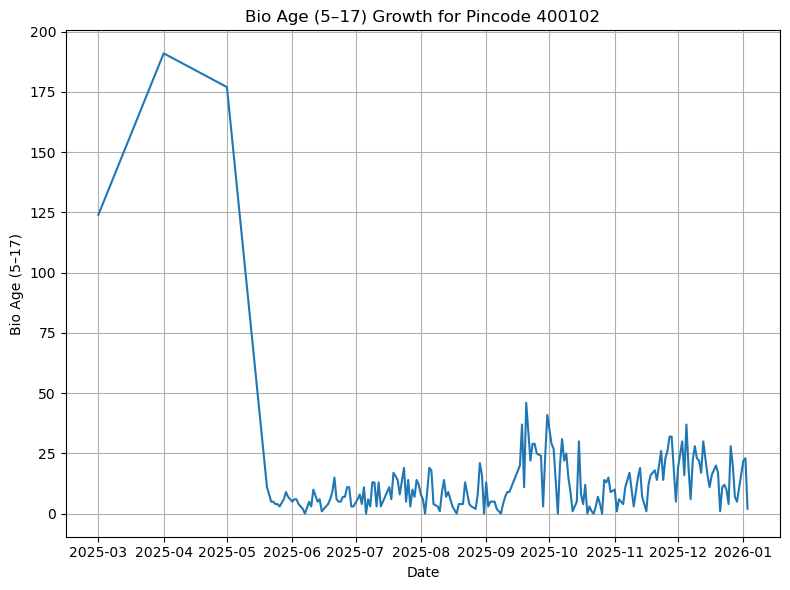

In [82]:
x = int(input("add a pincode which is you want to see progress bar"))
pincode = x

temp = df1[df1['pincode'] == pincode]

plt.figure(figsize=(8 , 6))
plt.plot(temp['date'], temp['bio_age_5_17'])
plt.xlabel("Date")
plt.ylabel("Bio Age (5–17)")
plt.title(f"Bio Age (5–17) Growth for Pincode {pincode}")
plt.tight_layout()
plt.grid(True)
plt.show()

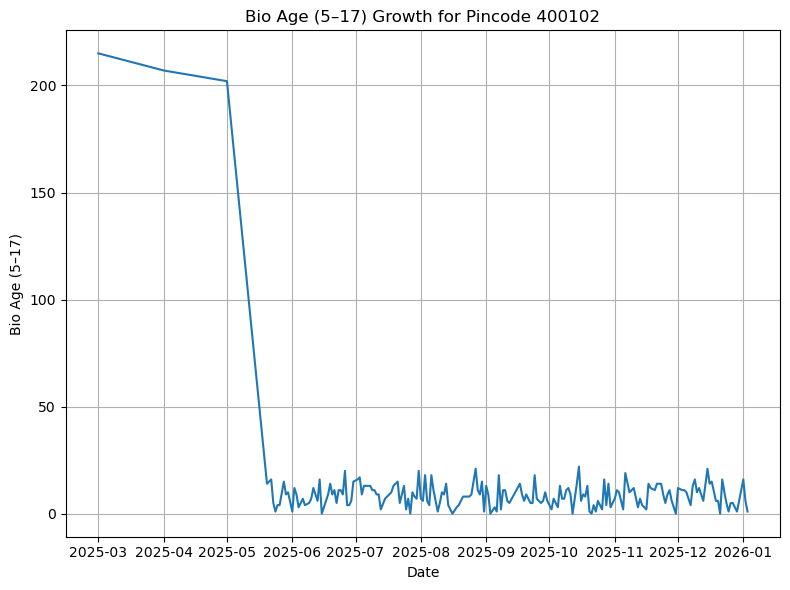

In [83]:
x = int(input("add a pincode which is you want to see progress bar"))
pincode = x

temp = df1[df1['pincode'] == pincode]

plt.figure(figsize=(8 , 6))
plt.plot(temp['date'], temp['bio_age_17_'])
plt.xlabel("Date")
plt.ylabel("Bio Age (5–17)")
plt.title(f"Bio Age (5–17) Growth for Pincode {pincode}")
plt.tight_layout()
plt.grid(True)
plt.show()